# Neural network visualisation

Import the required modules and define the necessary functions needed for later

In [51]:
import numpy
import random
import matplotlib.pyplot as plt

In [52]:
# sigmoid function
def sigfunc(x):
    return 1/(1+numpy.exp(-x))

def sigfuncder(x):
    return x*(1-x)

The cell below generates the random data to be used for the neural network

In [53]:
m = 10 #sample size = (2*m+2)
eta = 1 #training rate

#creating a random set of training data
training = numpy.array([1,0,random.randint(0,50)/100,random.randint(0,50)/100])
training = numpy.vstack((training,numpy.array([0,1,random.randint(50,100)/100,random.randint(50,100)/100])))

for i in range(m):
    training = numpy.vstack((training,numpy.array([1,0,random.randint(0,50)/100,random.randint(0,50)/100])))
    training = numpy.vstack((training,numpy.array([0,1,random.randint(50,100)/100,random.randint(50,100)/100])))
    

This is a visual representation of the random set of data.

Blue points represent points with value (1,0)

Red points represent points with vlue (0,1)

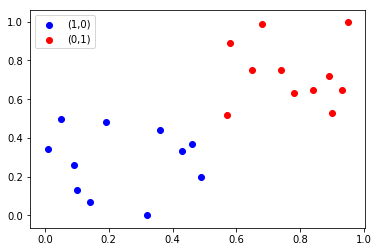

In [54]:
#scatter plot for visualisation of random sample
xpos0 = []
ypos0 = []
xpos1 = []
ypos1 = []
for i in range(int(training.shape[0]/2)):
    xpos0.append(training[2*i][2])
    ypos0.append(training[2*i][3])
    xpos1.append(training[2*i+1][2])
    ypos1.append(training[2*i+1][3])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(xpos0,ypos0,c='b', marker="o", label='(1,0)')
ax1.scatter(xpos1,ypos1,c='r', marker="o", label='(0,1)')
plt.legend(loc='upper left');
plt.show()

Take the training data and extract the values that make up its position and its colour. Then, put these values into their own array.

In [55]:
#take the position of each point and make a new array
position = numpy.array([training[0][2],training[0][3]])
for i in range(1,training.shape[0]):
    position = numpy.vstack((position,numpy.array([training[i][2],training[i][3]])))
position = position.transpose()

#take the colour of each point and make it into an array
colour = numpy.array([training[0][0],training[0][1]])
for i in range(1,training.shape[0]):
    colour= numpy.vstack((colour,numpy.array([training[i][0],training[i][1]])))
colour = colour.transpose()

The weights of are initialised as 2$\times$2 matriced with random entries

In [56]:
w2 = numpy.array([[random.random(),random.random()],[random.random(),random.random()]])
w3 = numpy.array([[random.random(),random.random()],[random.random(),random.random()]])

This is where the machine learning portion occurs.

First the input date is fed into the weights by dot product. 

Next, the error is calculated using the cost function and the derivative of the sigmoid function. 

Lastly, the weights are updated through stochastic gradient descent.

The process is repeated multiple times to get an accurate result.

In [57]:
epochw2 = [w2]
epochw3 = [w3]

for i in range(9999):
    #feedforward
    layer2 = sigfunc(numpy.dot(w2,position))
    layer3 = sigfunc(numpy.dot(w3,layer2))
    
    #error calc. + backpropagation
    errorlayer3 = (layer3 - colour)*(sigfuncder(layer3))
    errorlayer2 = numpy.dot((w3.transpose()),errorlayer3)*(sigfuncder(layer2))
    
    #stochastic gradient descent, update weights
    w3 = w3 - numpy.dot(errorlayer3,layer2.transpose())*eta/(2*m+2)
    w2 = w2 - numpy.dot(errorlayer2,position.transpose())*eta/(2*m+2)
    
    epochw2.append(w2)
    epochw3.append(w3)

Using the current weights we can give the machine a point, with coordinates (x,y) where x and y have values between 0 and 1, and it will tell us the most likely colour of that point.

In [58]:
print('Please input x and y coordinates, only numbers between 0 and 1.')
#xinput, yinput = (float(input('pleasue input x coordinate: ')),float(input('pleasue input y coordinate: ')))
xinput, yinput = (0.2,0.2)
point = numpy.array([xinput, yinput])

output = sigfunc(numpy.dot(w3,sigfunc(numpy.dot(w2,point))))
output = numpy.round(output)

if output[0] == 1 and output[1] == 0:
    print('Given point is Blue')
elif output[0] == 0 and output[1] == 1:
    print('Given output is Red')
else:
    print('Inconclusive')

Please input x and y coordinates, only numbers between 0 and 1.
Given point is Blue


At certain steps of the learning process, we can take points from the original set of data, and plot out another scater plot, where the computer will colour in what it deems is its most likely colour.

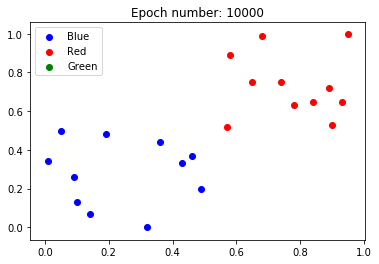

In [61]:
def visualise(epochno,epochw2,epochw3):
    
    w2 = epochw2[epochno-1]
    w3 = epochw3[epochno-1]
    output = sigfunc(numpy.dot(w3,sigfunc(numpy.dot(w2,position))))
    output = numpy.round(output)
    xpos0 = []
    ypos0 = []
    xpos1 = []
    ypos1 = []
    xposnil = []
    yposnil = []
    
    for i in range(output.shape[1]):
        if output[0][i] == 1 and output [1][i] == 0:
            xpos0.append(position[0][i])
            ypos0.append(position[1][i])
        elif output[0][i] == 0 and output [1][i] == 1:
            xpos1.append(position[0][i])
            ypos1.append(position[1][i])
        else:
            xposnil.append(position[0][i])
            yposnil.append(position[1][i])
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(xpos0,ypos0,c='b', marker="o", label='Blue')
    ax1.scatter(xpos1,ypos1,c='r', marker="o", label='Red')
    ax1.scatter(xposnil,yposnil,c='g', marker="o", label='Green')    
    plt.legend(loc='upper left');
    plt.title('Epoch number: {}'.format(epochno))
    plt.show()

#epochno = int(input('Please input which epoch to view: '))
visualise(10000,epochw2,epochw3)

Some examples can be seen below

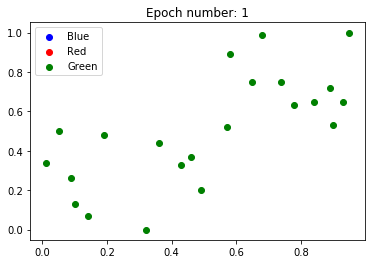

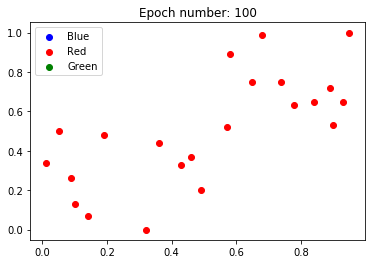

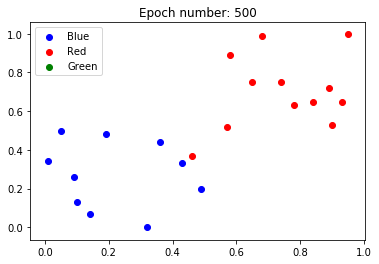

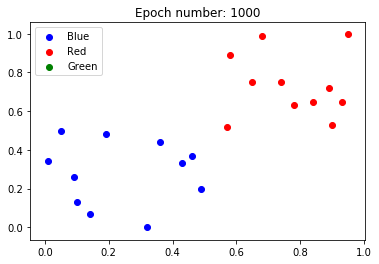

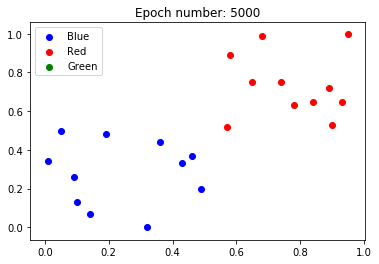

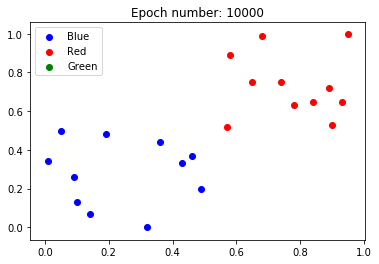

In [60]:
#some examples

visualise(1,epochw2,epochw3)
visualise(100,epochw2,epochw3)
visualise(500,epochw2,epochw3)
visualise(1000,epochw2,epochw3)
visualise(5000,epochw2,epochw3)
visualise(10000,epochw2,epochw3)

Finally, we can take the weights during the learning process and plot out a lorenz map, to help us understand its dynamics better.

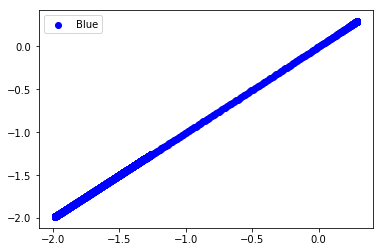

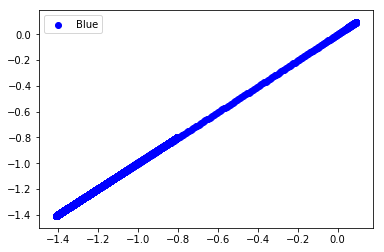

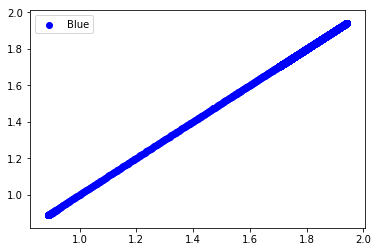

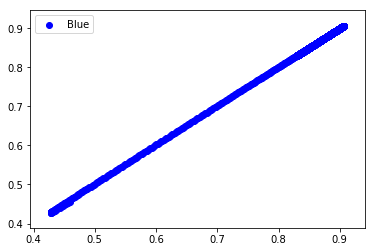

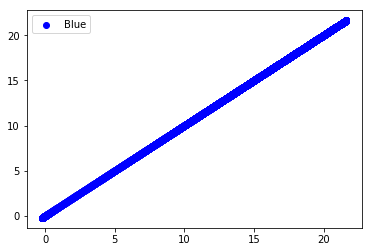

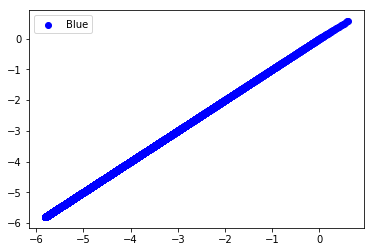

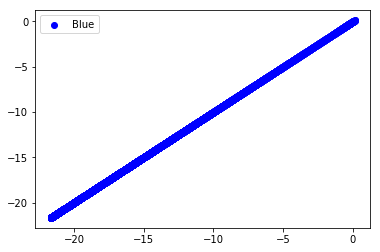

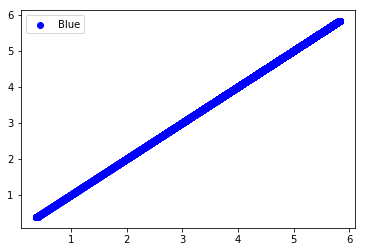

In [64]:
weight21 = []
weight22 = []
weight23 = []
weight24 = []
weight31 = []
weight32 = []
weight33 = []
weight34 = []

for i in range(len(epochw2)):
    weight21.append(epochw2[i][0][0])
    weight22.append(epochw2[i][0][1])
    weight23.append(epochw2[i][1][0])
    weight24.append(epochw2[i][1][1])

for i in range(len(epochw3)):
    weight31.append(epochw3[i][0][0])
    weight32.append(epochw3[i][0][1])
    weight33.append(epochw3[i][1][0])
    weight34.append(epochw3[i][1][1])

def lorenz(weight):
    xpos = weight[:len(weight)-1]
    ypos = weight[1:]
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(xpos,ypos,c='b', marker="o", label='Blue')
    plt.legend(loc='upper left');
    plt.show()

lorenz(weight21)
lorenz(weight22)
lorenz(weight23)
lorenz(weight24)
lorenz(weight31)
lorenz(weight32)
lorenz(weight33)
lorenz(weight34)